source: https://shangjingbo1226.github.io/teaching/2022-winter-DSC190-DM

Download nutrition facts for McDonalds https://www.kaggle.com/mcdonalds/nutrition-facts.

% # %load tex-macros
<div hidden>
\newcommand{\require}[1]{}

$\require{begingroup}\require{newcommand}$
$\long\def \forcecommand #1{\providecommand{#1}{}\renewcommand{#1}}$
$\forcecommand{\defeq}{\stackrel{\small\bullet}{=}}$
$\forcecommand{\ra}{\rangle}$
$\forcecommand{\la}{\langle}$
$\forcecommand{\pr}{{\mathbb P}}$
$\forcecommand{\qr}{{\mathbb Q}}$
$\forcecommand{\xv}{{\boldsymbol{x}}}$
$\forcecommand{\av}{{\boldsymbol{a}}}$
$\forcecommand{\bv}{{\boldsymbol{b}}}$
$\forcecommand{\cv}{{\boldsymbol{c}}}$
$\forcecommand{\dv}{{\boldsymbol{d}}}$
$\forcecommand{\ev}{{\boldsymbol{e}}}$
$\forcecommand{\fv}{{\boldsymbol{f}}}$
$\forcecommand{\gv}{{\boldsymbol{g}}}$
$\forcecommand{\hv}{{\boldsymbol{h}}}$
$\forcecommand{\nv}{{\boldsymbol{n}}}$
$\forcecommand{\sv}{{\boldsymbol{s}}}$
$\forcecommand{\tv}{{\boldsymbol{t}}}$
$\forcecommand{\uv}{{\boldsymbol{u}}}$
$\forcecommand{\vv}{{\boldsymbol{v}}}$
$\forcecommand{\wv}{{\boldsymbol{w}}}$
$\forcecommand{\zerov}{{\mathbf{0}}}$
$\forcecommand{\onev}{{\mathbf{0}}}$
$\forcecommand{\phiv}{{\boldsymbol{\phi}}}$
$\forcecommand{\cc}{{\check{C}}}$
$\forcecommand{\xv}{{\boldsymbol{x}}}$
$\forcecommand{\Xv}{{\boldsymbol{X}\!}}$
$\forcecommand{\yv}{{\boldsymbol{y}}}$
$\forcecommand{\Yv}{{\boldsymbol{Y}}}$
$\forcecommand{\zv}{{\boldsymbol{z}}}$
$\forcecommand{\Zv}{{\boldsymbol{Z}}}$
$\forcecommand{\Iv}{{\boldsymbol{I}}}$
$\forcecommand{\Jv}{{\boldsymbol{J}}}$
$\forcecommand{\Cv}{{\boldsymbol{C}}}$
$\forcecommand{\Ev}{{\boldsymbol{E}}}$
$\forcecommand{\Fv}{{\boldsymbol{F}}}$
$\forcecommand{\Gv}{{\boldsymbol{G}}}$
$\forcecommand{\Hv}{{\boldsymbol{H}}}$
$\forcecommand{\alphav}{{\boldsymbol{\alpha}}}$
$\forcecommand{\epsilonv}{{\boldsymbol{\epsilon}}}$
$\forcecommand{\betav}{{\boldsymbol{\beta}}}$
$\forcecommand{\deltav}{{\boldsymbol{\delta}}}$
$\forcecommand{\gammav}{{\boldsymbol{\gamma}}}$
$\forcecommand{\etav}{{\boldsymbol{\eta}}}$
$\forcecommand{\piv}{{\boldsymbol{\pi}}}$
$\forcecommand{\thetav}{{\boldsymbol{\theta}}}$
$\forcecommand{\tauv}{{\boldsymbol{\tau}}}$
$\forcecommand{\muv}{{\boldsymbol{\mu}}}$
$\forcecommand{\sd}{\text{SD}}$
$\forcecommand{\se}{\text{SE}}$
$\forcecommand{\med}{\text{median}}$
$\forcecommand{\median}{\text{median}}$
$\forcecommand{\Ber}{{\text{Ber}}}$
$\forcecommand{\Bin}{{\text{Bin}}}$
$\forcecommand{\Geo}{{\text{Geo}}}$
$\forcecommand{\Unif}{{\text{Unif}}}$
$\forcecommand{\Poi}{{\text{Poi}}}$
$\forcecommand{\Exp}{{\text{Exp}}}$
$\forcecommand{\Chisq}{{\chi^2}}$
$\forcecommand{\N}{\mathbb{N}}$
$\forcecommand{\iid}{{\stackrel{iid}{\sim}}}$
$\forcecommand{\px}{p_{X}}$
$\forcecommand{\fx}{f_{X}}$
$\forcecommand{\Fx}{F_{X}}$
$\forcecommand{\py}{p_{Y}}$
$\forcecommand{\pxy}{p_{X,Y}}$
$\forcecommand{\po}{{p_0}}$
$\forcecommand{\pa}{{p_a}}$
$\forcecommand{\Xbar}{\overline{X}}$
$\forcecommand{\Ybar}{\overline{Y}}$
$\forcecommand{\Zbar}{\overline{Z}}$
$\forcecommand{\nXbar}{n \cdot \overline{X}}$
$\forcecommand{\nYbar}{n \cdot \overline{Y}}$
$\forcecommand{\nZbar}{n \cdot \overline{Z}}$
$\forcecommand{\Xn}{X_1, X_2, \dots, X_n}$
$\forcecommand{\Xm}{{X_1, X_2, \dots, X_m}}$
$\forcecommand{\Yn}{Y_1, Y_2, \dots, Y_n}$
$\forcecommand{\Ym}{{Y_1, Y_2, \dots, Y_m}}$
$\forcecommand{\sumXn}{X_1 + X_2 + \dots + X_n}$
$\forcecommand{\sumym}{Y_1 + Y_2 + \dots + Y_m}$
$\forcecommand{\la}{\ell_\alpha}$
$\forcecommand{\ua}{u_\alpha}$
$\forcecommand{\at}{{\alpha/2}}$
$\forcecommand{\mux}{\mu_{X}}$
$\forcecommand{\muy}{\mu_{Y}}$
$\forcecommand{\sx}{\sigma_{X}}$
$\forcecommand{\sy}{\sigma_{Y}}$
$\forcecommand{\pvalue}{$p$-value}$
$\forcecommand{\Ho}{H_{0}}$
$\forcecommand{\Ha}{H_{a}}$
$\forcecommand{\pvalue}{p\text{-value}}$
$\forcecommand{\E}{\mathbb{E}}$
$\newcommand{\E}{\mathbb{E}}$
\vskip-\parskip
\vskip-\baselineskip
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mcdonald_menu = pd.read_csv("menu.csv")
mcdonald_menu.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


<Axes: xlabel='Calories', ylabel='Count'>

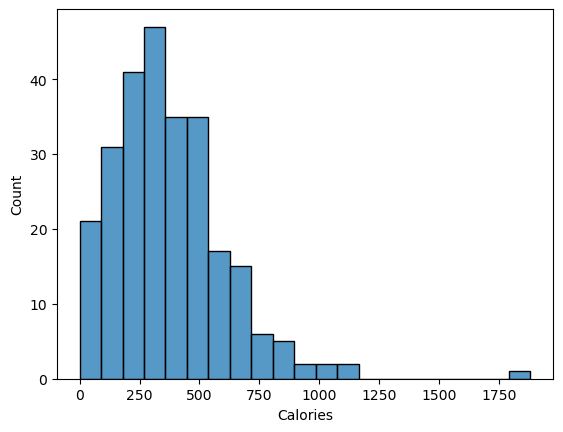

In [3]:
sns.histplot(mcdonald_menu['Calories'])

`Calories` is numeric data type and since it has an absolute zero, it is a quantitative data type that is ratio-scaled, meaning we can operate multiplication and division on it.

True
False


/var/folders/8n/ff8_52m15k542z26_73z43x40000gn/T/ipykernel_41769/3565164511.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if df.applymap(lambda x: isinstance(x, (int, float))).all().all():
/var/folders/8n/ff8_52m15k542z26_73z43x40000gn/T/ipykernel_41769/3565164511.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if df.applymap(lambda x: isinstance(x, (int, float))).all().all():


<Axes: >

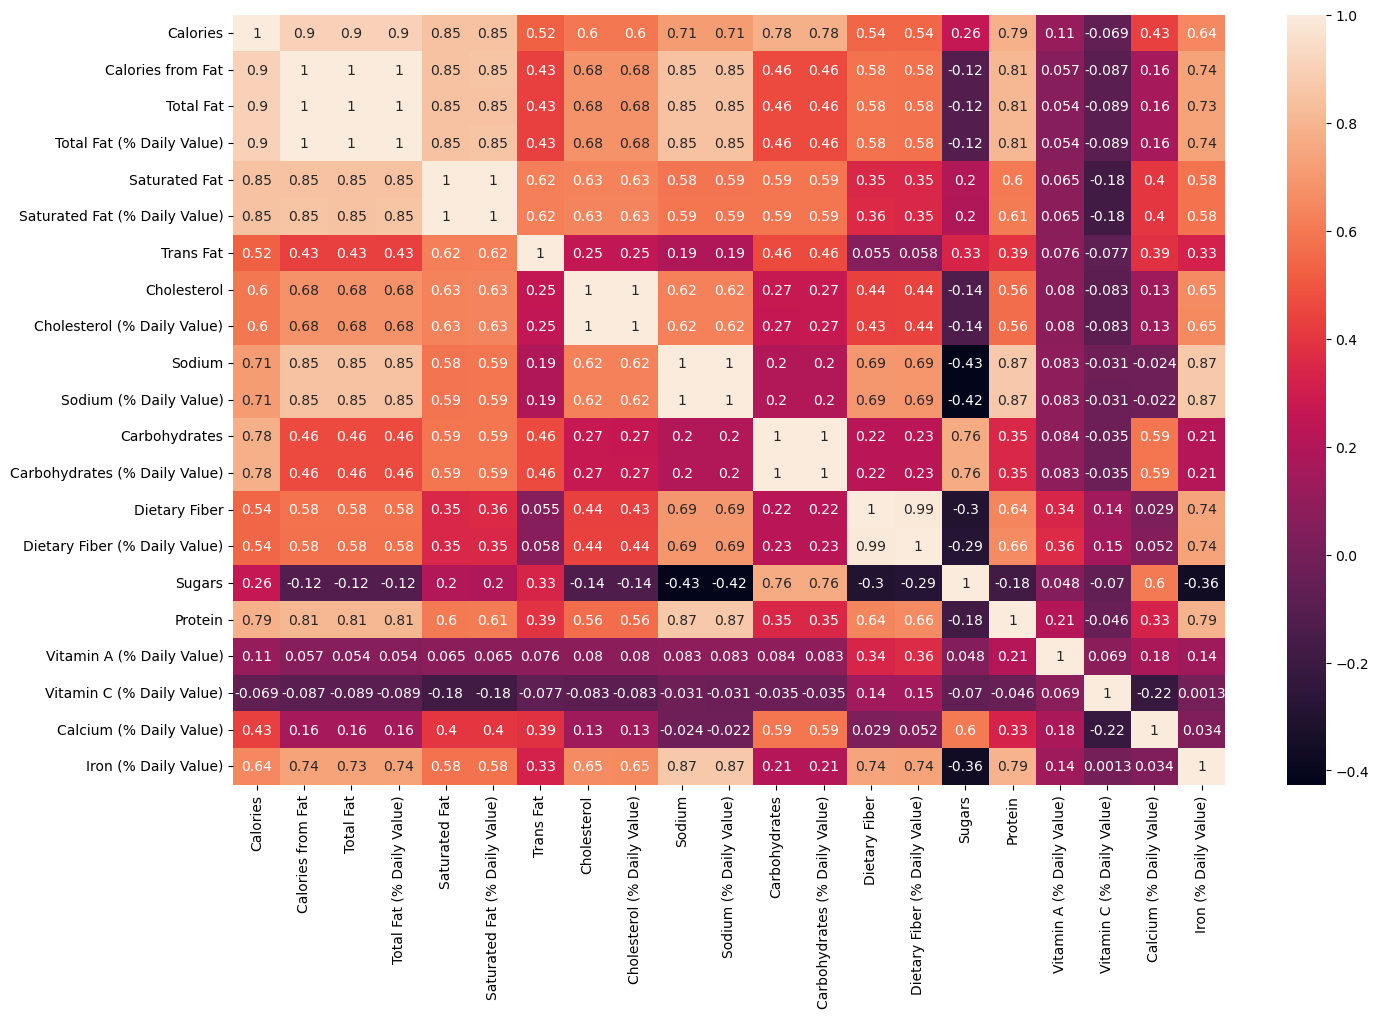

In [4]:
def haveOnlyNumericData(df, columns):
    if df.applymap(lambda x: isinstance(x, (int, float))).all().all():
        return True
    else:
        return False
        

mcdonald_numeric = mcdonald_menu.iloc[:,3:]
columns = mcdonald_numeric.columns
print(haveOnlyNumericData(mcdonald_numeric, columns))
print(haveOnlyNumericData(mcdonald_menu, mcdonald_menu.columns))
plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap(mcdonald_numeric.corr(), annot=True)

The diagonal elements are always one because there is a one-to-one correlation to the identical variable. According to the heatmap, the `Total Fat`, `Protein`, and `Carbohydrates` have correlation of 0.9, 0.79, and 0.78, respectively, to `Calories`. Then, we can deduce that `Total Fat` and `Protein` have the second and third largest correlation with `Calories` (the first one is with itself). Remarkably, `Vitamin C (% Daily Value)` is the only feature with negative correlation with `Calories`. This is expected because typically fruits are foods with high Vitamin C, and since McDonald menu typically does not contain fruit, then this negative correlation is plausible.

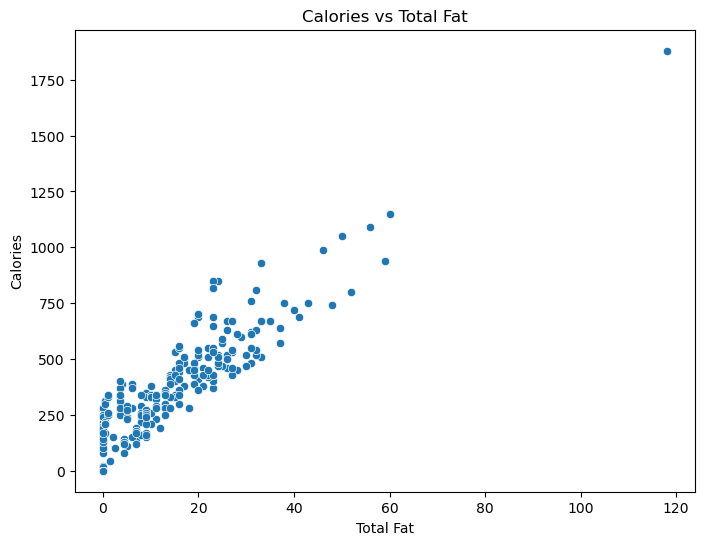

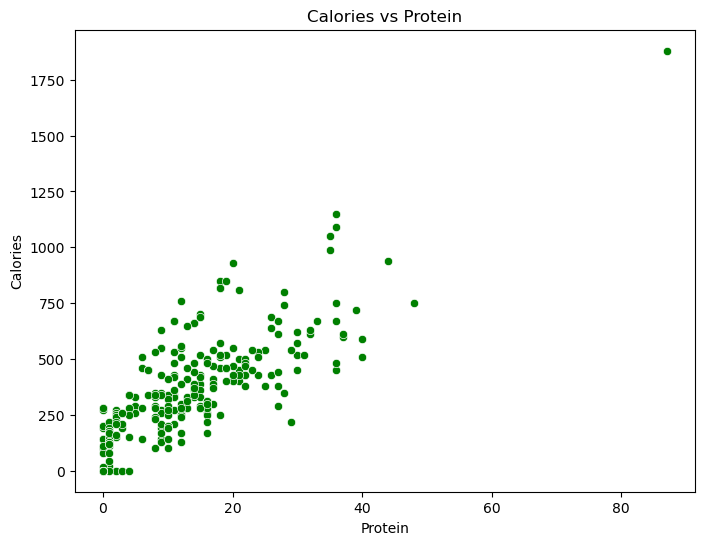

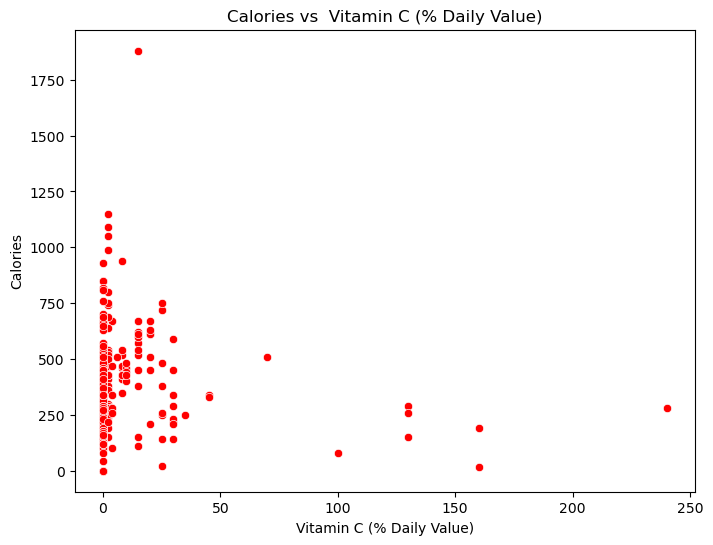

In [5]:
features_with_positive_corr = [mcdonald_menu.columns[4], mcdonald_menu.columns[7]]
features_with_negative_corr = [mcdonald_menu.columns[-3]]
plt.rcParams['figure.figsize'] = (8,6)


sns.scatterplot(data=mcdonald_menu, x='Total Fat', y='Calories')
plt.title('Calories vs Total Fat')
plt.show()

sns.scatterplot(data=mcdonald_menu, x='Protein', y='Calories', color='green')
plt.title('Calories vs Protein')
plt.show()

sns.scatterplot(data=mcdonald_menu, x='Vitamin C (% Daily Value)', y='Calories', color='red')
plt.title('Calories vs  Vitamin C (% Daily Value)')
plt.show()




Plotting the boxplot to visualize the overall mean, median, and the percent quartiles.

In [6]:
mcdonald_numeric['Total Fat'].describe()

count    260.000000
mean      14.165385
std       14.205998
min        0.000000
25%        2.375000
50%       11.000000
75%       22.250000
max      118.000000
Name: Total Fat, dtype: float64

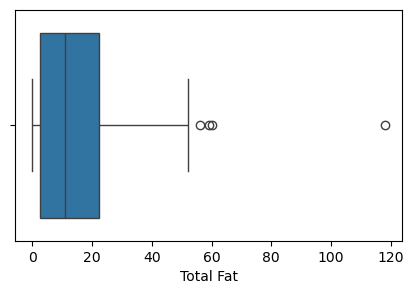

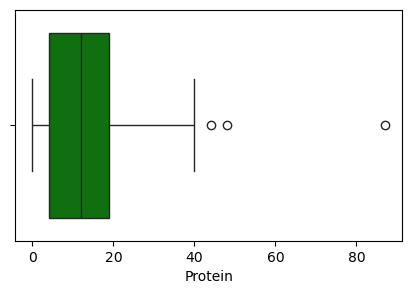

<Axes: xlabel='Vitamin C (% Daily Value)'>

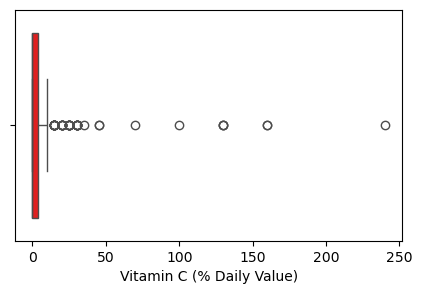

In [7]:
plt.rcParams['figure.figsize'] = (5,3)

sns.boxplot(x=mcdonald_numeric['Total Fat'])
plt.show()


sns.boxplot(x=mcdonald_numeric['Protein'], color='green')
plt.show()

sns.boxplot(x=mcdonald_numeric['Vitamin C (% Daily Value)'],color='red')

What is the original mean, median, mode, and standard deviation of the dataset?

In [8]:
mcdonald_menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [9]:
def hasMissingValues(df):
    return df.isnull().any().any()    


print(hasMissingValues(mcdonald_menu))

False


If this data was normally distributed, we know that 99.7% of the data resides within three standard deviations from the mean. For now, we're interested in closing up the outliers and seeing what will happen as a result.


Keeping three standard deviation from is equivalent to keeping data that is $[\mu - 3\sigma, \mu + 3\sigma]$.

In [10]:
mu = mcdonald_numeric.mean()
sigma = mcdonald_numeric.std()   
lower, upper = mu - 3 * sigma, mu + 3 * sigma
mcdonald_numeric_restricted = mcdonald_numeric.where((mcdonald_numeric >= lower) & (mcdonald_numeric <= upper), np.nan)



print(hasMissingValues(mcdonald_numeric_restricted))
print(mcdonald_numeric_restricted.isnull().sum())

True
Calories                         3
Calories from Fat                3
Total Fat                        3
Total Fat (% Daily Value)        3
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        9
Cholesterol                      4
Cholesterol (% Daily Value)      4
Sodium                           3
Sodium (% Daily Value)           3
Carbohydrates                    5
Carbohydrates (% Daily Value)    5
Dietary Fiber                    4
Dietary Fiber (% Daily Value)    4
Sugars                           3
Protein                          2
Vitamin A (% Daily Value)        6
Vitamin C (% Daily Value)        7
Calcium (% Daily Value)          0
Iron (% Daily Value)             3
dtype: int64


In [11]:
mcdonald_numeric_restricted.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,257.000000,257.000000,257.000000,257.000000,260.000000,260.000000,251.000000,256.000000,256.000000,257.000000,...,255.000000,255.000000,256.000000,256.000000,257.000000,258.000000,254.000000,253.000000,260.000000,257.000000
mean,356.536965,120.291829,13.408560,20.645914,6.007692,29.965385,0.153386,46.972656,15.734375,469.824903,...,45.568627,15.188235,1.546875,6.195312,28.322957,12.918605,10.279528,4.620553,20.973077,7.377432
std,211.941065,108.617072,12.059278,18.560162,5.321873,26.639209,0.336717,59.909370,19.960150,523.268973,...,25.472121,8.492925,1.427239,5.749760,26.958170,10.276582,12.480365,9.719391,17.019953,8.113066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.000000,3.000000,1.000000,4.750000,0.000000,5.000000,2.000000,100.000000,...,30.000000,10.000000,0.000000,0.000000,5.000000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,32.500000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.000000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,480.000000,200.000000,22.000000,34.000000,10.000000,48.000000,0.000000,61.250000,21.000000,850.000000,...,58.500000,19.500000,2.000000,10.000000,47.000000,18.000000,15.000000,2.000000,30.000000,15.000000
max,1050.000000,510.000000,56.000000,87.000000,20.000000,102.000000,1.000000,300.000000,100.000000,2170.000000,...,118.000000,39.000000,6.000000,24.000000,115.000000,44.000000,70.000000,70.000000,70.000000,30.000000


Now we will replace all the Nan values with column's mean value.

In [12]:
mcdonald_numeric_fill_mean = mcdonald_numeric_restricted.fillna(mcdonald_numeric_restricted.mean())
print(hasMissingValues(mcdonald_numeric_fill_mean))
mcdonald_numeric_fill_mean.describe()

False


,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,356.536965,120.291829,13.408560,20.645914,6.007692,29.965385,0.153386,46.972656,15.734375,469.824903,...,45.568627,15.188235,1.546875,6.195312,28.322957,12.918605,10.279528,4.620553,20.973077,7.377432
std,210.710032,107.986184,11.989233,18.452357,5.321873,26.639209,0.330815,59.444949,19.805418,520.229631,...,25.225053,8.410548,1.416174,5.705188,26.801587,10.236827,12.334957,9.587148,17.019953,8.065942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,480.000000,200.000000,22.000000,34.000000,10.000000,48.000000,0.000000,60.000000,21.000000,842.500000,...,58.000000,19.000000,2.000000,10.000000,46.250000,18.000000,15.000000,4.000000,30.000000,15.000000
max,1050.000000,510.000000,56.000000,87.000000,20.000000,102.000000,1.000000,300.000000,100.000000,2170.000000,...,118.000000,39.000000,6.000000,24.000000,115.000000,44.000000,70.000000,70.000000,70.000000,30.000000


Now that we have filled the Nan values, it appears that besides the standard deviation having a slight decrease, the rest of the statistics between `mcdonald_numeric_restricted` and `mcdonald_numeric_fill_mean` appears to be unchanged, which somewhat makes sense since we fill the Nan values to be the column's mean.

### Train and Predict Linear Regression

We want to predict calories by using the features `Total Fat`, `Protein`, and `Carbohydrates` from the original dataset.
Recall that we can use ordinar least squares (OLS) for choosing unknown parameters in a linear regression. Then we  can use this equation (1): $\hat{y}_i = \displaystyle{\sum_{j=1}^d x_{i,j} w_j + b}$, where
- ${\hat{y_i}}$ is the prediction for the i-th instance
- $x_{i,j}$ is the j-th feature for the i-th instance
- $w_j$ is the weight for the j-th feature
- $b$ is the intercept (it is 1)

We can set up our prediction with the following equation:
$$\hat{\text{Calories}} = b + w_1 \cdot (\text{Carbohydrates}) + w_2 \cdot (\text{Protein}) + w_3 \cdot (\text{Total Fat})$$

Our task now is to solve for the paramters $w_{j}$, where $1 \leq j \leq 3$ and $b$. 

Condensing and rewriting equation (1), we obtain $\hat{y}_i = \boldsymbol{w}^T\boldsymbol{x}_i + b$. But we want to capture all $n$ instances (for example, here we have 260 total instances). So altogether  we will use $\boldsymbol{Y} = \boldsymbol{W}^T\boldsymbol{X} + \boldsymbol{b}$ to solve for the parameters.


Closed Form Solution for Solving Paramters: $\boldsymbol{W} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X^T}Y$

Here I can do this in three ways: linear algebra, `statsmodels`, and stochastic gradient descent. 



#### 1. Linear Regression - Linear Algebra
(The closed-form solution)

In [13]:
X = mcdonald_menu[['Carbohydrates', 'Protein', 'Total Fat']]
X.insert(X.shape[1], 'b', 1)
X

,Carbohydrates,Protein,Total Fat,b
0,31,17,13.0,1
1,30,18,8.0,1
2,29,14,23.0,1
3,30,21,28.0,1
4,30,21,23.0,1
...,...,...,...,...
255,80,12,17.0,1
256,106,15,23.0,1
257,53,8,11.0,1
258,114,21,32.0,1


In [14]:
Y = mcdonald_menu[['Calories']]
Y

,Calories
0,300
1,250
2,370
3,450
4,400
...,...
255,510
256,690
257,340
258,810


In [15]:
from numpy.linalg import inv

In [16]:
def solve_parameters_closed_form(X, Y):
    return inv(X.T @ X) @ X.T @ Y

print(X.shape)
print(len(Y))
solve_parameters_closed_form(X.to_numpy(), Y.to_numpy())

(260, 4)
260


array([[ 3.97896903],
       [ 4.04524858],
       [ 9.01862206],
       [-1.82929193]])

Recall that there are some ways we  can evaluate our predicted parameters, and they are MAE (mean absolute error), MSE (mean square error), and RMSE (rooted MSE).

$\begin{align}
MAE = \displaystyle{\frac{1}{n} \sum_{i=1}^n |Y_i - \hat{Y}_i|} \\
MSE = \displaystyle{\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2} \\
RMSE = \displaystyle{\sqrt{\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2}} 
\end{align}$


In [17]:
def find_MAE(n, predicted_parameters):
    return (1/n) * np.abs((np.linalg.norm(Y.to_numpy() - X @ predicted_parameters)))

def find_MSE(n, predicted_parameters):
    return (1/n) * (np.linalg.norm(Y.to_numpy() - X @ predicted_parameters) ** 2)


def find_RMSE(n, predicted_parameters):
    return find_MSE(n, predicted_parameters) ** (1/2)

n = len(mcdonald_menu)
print("MAE =", find_MAE(n, solve_parameters_closed_form(X.to_numpy(), Y.to_numpy())))
print("MSE =", find_MSE(n, solve_parameters_closed_form(X.to_numpy(), Y.to_numpy())))
print("RMSE =", find_RMSE(n, solve_parameters_closed_form(X.to_numpy(), Y.to_numpy())))

MAE = 0.34081555609026104
MSE = 30.200363251009602
RMSE = 5.495485715658772


In [18]:
Y_hat = X @ solve_parameters_closed_form(X.to_numpy(), Y.to_numpy())
Y_hat

,0
0,307.530061
1,262.503230
2,377.622597
3,455.011417
4,409.918307
...,...
255,518.347789
256,688.048462
257,340.622898
258,825.319304


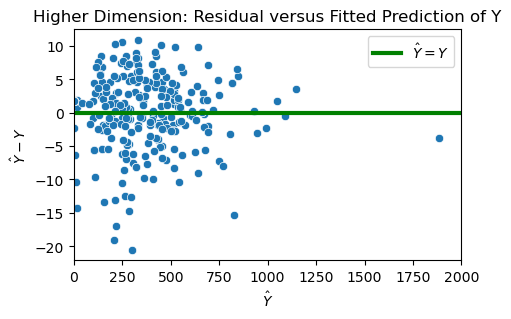

In [19]:
sns.scatterplot(x = Y_hat.values.flatten(), y = (Y.to_numpy() - Y_hat).values.flatten())

sns.lineplot(x=[-1, 2000], y=[0,0], label="$\hat{Y}=Y$", color = 'green', linewidth = 3)
plt.xlabel("$\hat{Y}$")
plt.ylabel("$\hat{Y} - Y$")
plt.xlim([0, 2000])
plt.title("Higher Dimension: Residual versus Fitted Prediction of Y")
plt.show()

Roughly, we neither see residuals clustering around zero nor do we see the residuals versus fitted values to have constant variance. Hence, this is a sign of heteroskedasticity. It fails one of the assumptions of what makes OLS an accurate model for this type of data.

#### 2. `statsmodels` and `sklearn`

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.OLS(Y,X)
results = model.fit()
results.params

Carbohydrates    3.978969
Protein          4.045249
Total Fat        9.018622
b               -1.829292
dtype: float64

The predictions are exactly the ones we found using the explicit matrix multiplication. If we use `statsmodels`, we can look at the statistical diagnostics!

In [21]:
mcdonald_menu = mcdonald_menu.rename(columns={'Total Fat': 'TotalFat'})
model_with_summary = smf.ols(formula='Calories ~ Carbohydrates + Protein + TotalFat', data=mcdonald_menu).fit()

print(model_with_summary.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.624e+05
Date:                Fri, 23 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:12:07   Log-Likelihood:                -811.95
No. Observations:                 260   AIC:                             1632.
Df Residuals:                     256   BIC:                             1646.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.8293      0.715     -2.559

For example, we wish to find out more about the residuals. So, one way we can go about this is to see if the observations follow a natural sequential order. We can witness this by checking if residuals have distinct patterns across time. If it does, this could mean lack of independence, and we call this autocorrelation.

The Durbin Watson is a common method to detect serial correlation. The range for the test statstics for Durban-Watson ranges from 0 to 4 inclusive. We can conclude that there may not be autocorreation since Durbin-Watson test statistics is 1.370 and we know 2 means that there is not much autocorrelation.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  mean_squared_error
# from sklearn.metrics import root_mean_squared_error


model = LinearRegression()
model.fit(
    X=mcdonald_menu[['Carbohydrates', 'Protein', 'TotalFat']], 
    y=mcdonald_menu[['Calories']])

print(model.intercept_ )
print(model.coef_)


mcdonald_menu["sklearn_preds"] = model.predict(mcdonald_menu[['Carbohydrates', 'Protein', 'TotalFat']])
print(mean_absolute_error(mcdonald_menu['Calories'],mcdonald_menu["sklearn_preds"]))
print(mean_squared_error(mcdonald_menu['Calories'],mcdonald_menu["sklearn_preds"]))
# print(root_mean_squared_error(mcdonald_menu['Calories'],mcdonald_menu["sklearn_preds"]))

[-1.82929193]
[[3.97896903 4.04524858 9.01862206]]
4.211458660841402
30.200363251009595


#### 3. Stochastic Gradient Descent

Sometimes, we cannot use the closed-form solution to solve for the parameters to because it is inefficient or can't be solved. So we can try stochastic gradient descent. This allows us to tweak the squared-loss function, $L = \displaystyle{\sum_{i=1}^n(y_i-\hat{y}_i)^2}$. 

We can tweak this loss function by randomly initializing parameters and try to improve the paramters over iterations. Our goal is to now find $w_j$ such that $\displaystyle{\frac{\partial L}{\partial w_j} \approx 0}$.

For cleaner partial gradients, define loss function to be $\displaystyle{L := \frac{1}{2} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$. Then working out the partial gradient we have

$\begin{align}
\displaystyle{\frac{\partial L}{\partial w_j} = \frac{\partial}{\partial w_j}\Big(\frac{1}{2}\sum(y_i - \hat{y}_i)^2\Big)  = \frac{1}{2}\sum \Big(\frac{\partial (y_i - \hat{y}_i)^2}{\partial w_j}\Big)} \nonumber\\
\displaystyle{ = \frac{1}{2} \sum \Big(\frac{\partial (y_i - \hat{y}_i)^2}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial w_j} \Big)}
\displaystyle{=\frac{1}{2} \sum \Big(x_{i,j} \cdot -2 (y_i - \hat{y}_i) \Big)} \nonumber \\
\displaystyle{= - \sum_{i=1}^n x_{i,j}(y_i - \hat{y}_i).} \nonumber
\end{align}
$

Then we can take the result from above and update the parameters by $\displaystyle{w_j = w_j - \lambda \frac{\partial L}{\partial w_j}}$, where $\lambda$ is the learning rate, a hyperparamter that we can either set to be 1e-2 or 1e-3. Alternatively, we can utilize learn rate scheduler (e.g. constant learning rate, linear decay, cosine learning rate, adaptive learning rate, ...)

$$X = \begin{bmatrix} x_{11} & \cdots & x_{1d} & 1 \\
                        \vdots & \ddots & \vdots & 1 \\
                        x_{n1} & \cdots & x_{nd} & 1
        \end{bmatrix},

W = \begin{bmatrix} w_1 \\
                      \vdots \\
                      w_d \\
                      1
\end{bmatrix}$$

In [23]:
import torch
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6],  'C': [7, 8, 9]}
data2 = {'A': [3, 3, 3], 'B': [5, 5, 5], 'C': [2, 2, 2]}
df = pd.DataFrame(data)
df1 = pd.DataFrame(data2)

# Convert to tensor
tensor = torch.tensor(df.values)
tensor1 = torch.tensor(df1.values)



print(tensor)
print(tensor1)

tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
tensor([[3, 5, 2],
        [3, 5, 2],
        [3, 5, 2]])


In [24]:
mcdonald_menu['Carbohydrates']

0       31
1       30
2       29
3       30
4       30
      ... 
255     80
256    106
257     53
258    114
259     57
Name: Carbohydrates, Length: 260, dtype: int64

In [25]:
import torch
 
def find_linear_predictions(w, x):
    return torch.mm(w, x)
 
def find_MSE(y_pred, y):
    return torch.mean((y - y_pred) ** 2)


In [26]:
X = mcdonald_menu[['Carbohydrates', 'Protein', 'TotalFat']]
X.insert(len(X.columns), 'b', 1)
X

,Carbohydrates,Protein,TotalFat,b
0,31,17,13.0,1
1,30,18,8.0,1
2,29,14,23.0,1
3,30,21,28.0,1
4,30,21,23.0,1
...,...,...,...,...
255,80,12,17.0,1
256,106,15,23.0,1
257,53,8,11.0,1
258,114,21,32.0,1


In [27]:
X_tensor = torch.tensor(X.values, requires_grad=True)
X_tensor
print(X_tensor.shape)
print(X_tensor)

torch.Size([260, 4])
tensor([[ 31.,  17.,  13.,   1.],
        [ 30.,  18.,   8.,   1.],
        [ 29.,  14.,  23.,   1.],
        ...,
        [ 53.,   8.,  11.,   1.],
        [114.,  21.,  32.,   1.],
        [ 57.,  10.,  16.,   1.]], dtype=torch.float64, requires_grad=True)


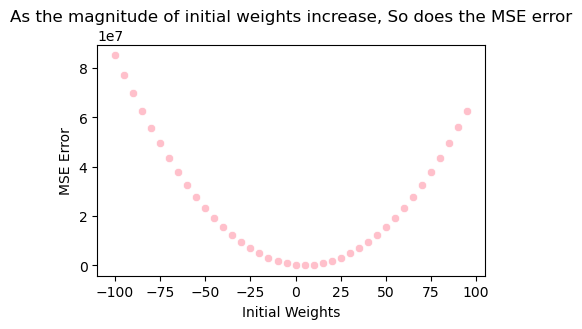

In [28]:
MSE_loss_list = []
dummy_values = np.arange(-100, 100, 5)
for dummy_value in dummy_values:
        initial_weights = [float(dummy_value)] * X_tensor.shape[1]
        df = pd.DataFrame(initial_weights, columns=["w"])
        w_tensor = torch.tensor(df.values, requires_grad=True)
        Y_tensor = torch.tensor(mcdonald_menu[['Calories']].values)
        MSE_loss_list.append(find_MSE(Y_tensor, find_linear_predictions(X_tensor, w_tensor)).item())
sns.scatterplot(x=dummy_values, y=MSE_loss_list, color="pink")
plt.title("As the magnitude of initial weights increase, So does the MSE error")
plt.xlabel("Initial Weights")
plt.ylabel("MSE Error")
plt.show()

Weights: tensor([[4544.1885],
        [1413.3500],
        [1658.3596],
        [  73.6538]], dtype=torch.float64)
Epoch: 0, 	193129.8076923077
Weights: tensor([[-3245670.7878],
        [ -867275.6250],
        [ -997574.0228],
        [  -51366.0356]], dtype=torch.float64)
Epoch: 1, 	88164310767.68925


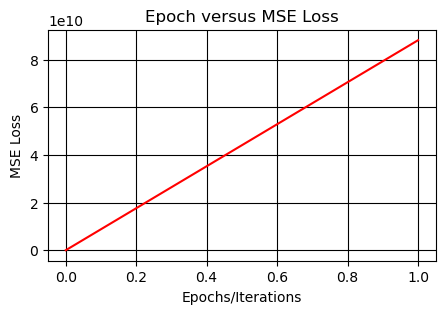

In [29]:
X_tensor = torch.tensor(X.values, requires_grad=True)
initial_weights = [float(0.0)] * X_tensor.shape[1]
df = pd.DataFrame(initial_weights, columns=["w"])
w_tensor = torch.tensor(df.values, requires_grad=True)
w_tensor = torch.tensor(df.values, requires_grad=True)

learning_rate = 0.1 
MSE_loss_list = []
epoch = 2
 
for i in range (epoch):    
    if (w_tensor.grad != None):
        w_tensor.grad.data.zero_()
    Y_pred = find_linear_predictions(X_tensor, w_tensor)
    MSE_loss = find_MSE(Y_pred, Y_tensor)
    MSE_loss_list.append(MSE_loss.item())
    MSE_loss.backward()
    w_tensor.data = w_tensor.data - learning_rate * w_tensor.grad.data
    print("Weights:", w_tensor.data)
    print('Epoch: {}, \t{}'.format(i, MSE_loss.item()))
    

plt.plot(MSE_loss_list, 'r')
plt.grid('True', color='black')
plt.title("Epoch versus MSE Loss")
plt.xlabel("Epochs/Iterations")
plt.ylabel("MSE Loss")
plt.show()

We wish to decrease the MSE loss. We noticed that the magnitude of the weights increase, so does the mean squared error. This calls for regularization of our parameter, $\boldsymbol{W}$. Recall that there are two ways to regularize our parameter in linear regression: Ridge Regression (L2 - Norm) and Lasso Regression (L1- Norm).